In [1]:
import numpy as np
import setting 
setting.load()
import noc
import matplotlib.pyplot as plt
noc.plotting.load()

In [2]:
w = np.loadtxt("../data/w")
n = np.shape(w)[0]
a = w - np.eye(n)
tau = 20e-3

In [3]:
# standard controllability 
# define 10 random input channels 
b = np.random.randn(n, 10)
p = noc.gramians.ctrl(a,b)
u, s, _ = np.linalg.svd(p)
p_evals =  s / np.mean(s) 
xs = [ noc.simulate.impulse(a,tau,n, b.dot(np.random.randn(10,1))[:,0], 0.3, u.T)  for _ in range(10) ]
ts = xs[0][0]
xs = [x[1] for x in xs]

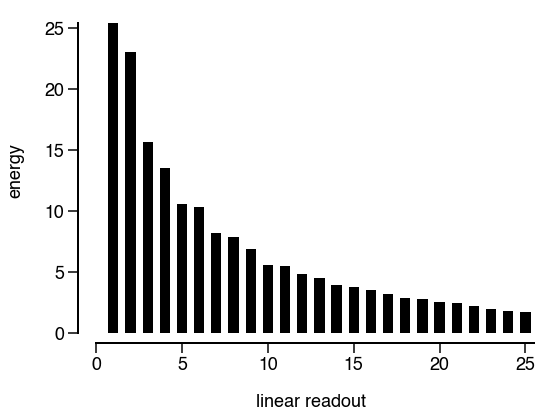

In [4]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)
ax = fig.add_subplot(1,1,1)
noc.plotting.adjust_spines(ax.spines)
ax.set_xlim(-0.5,25.5)
ax.bar(range(1,n+1), height=p_evals, width=0.6,color='black')
ax.set_ylabel("energy")
ax.set_xlabel("linear readout")
plt.show()

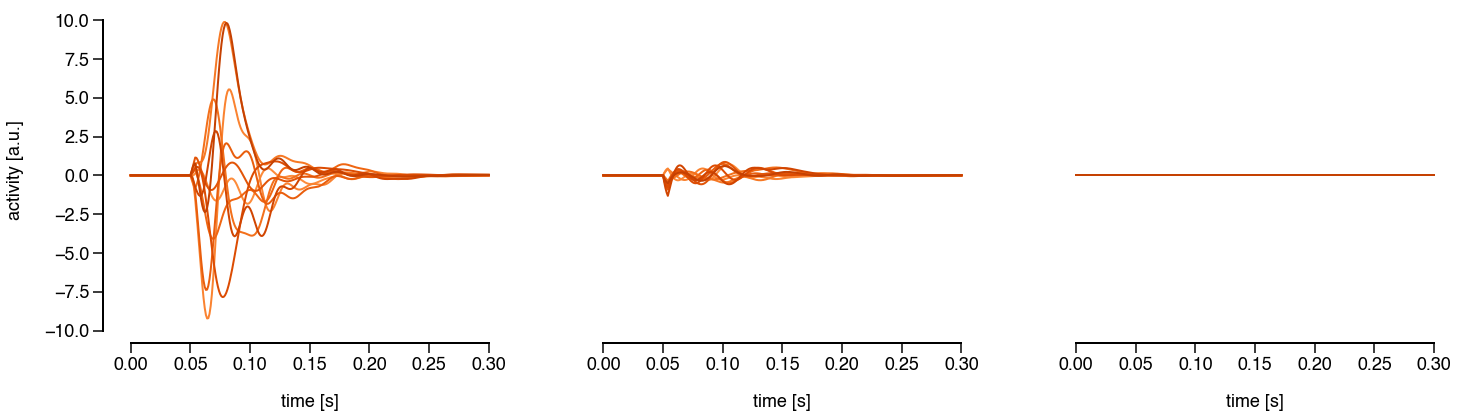

In [5]:
modes = [0, 50, 199]
fig = plt.figure(figsize=(len(modes)*8, 6))
fig.patch.set_alpha(0)
axes = fig.subplots(1,len(modes),sharey=True)
axes[0].set_ylabel("activity [a.u.]")
for i, ax in enumerate(axes):
    ys = [x[:,modes[i]] for x in xs]
    ax.set_xlabel("time [s]")
    noc.plotting.adjust_spines(ax.spines)
    if i > 0:
        ax.tick_params(axis='y', which='both',length=0)
        ax.spines["left"].set_visible(False)
    for j in range(10):
        ax.plot(ts,ys[j],color=plt.cm.Oranges(0.5+j/30.),linewidth=2)
plt.show()